In [1]:
# import the important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import   ttest_1samp , ttest_ind
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.stats.api as sm
import scipy.stats as stats
from scipy.stats import norm
from IPython.display import Image


**PROBLEM 1**


A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

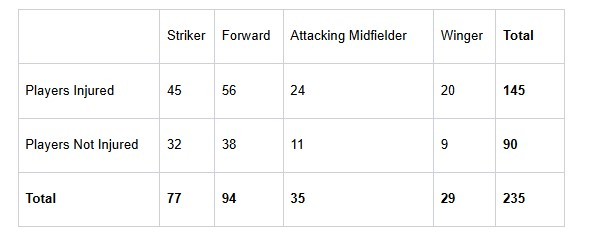

In [68]:
Image('/content/drive/MyDrive/project/Inferential Statistics - Graded Project/1.jpg')

1.1 What is the probability that a randomly chosen player would suffer an injury?

In [3]:
Total_number_of_players_injured=145
Total_number_of_players_altogether=235
print('The probability that a randomly chosen player would suffer an injury is ', round(Total_number_of_players_injured/Total_number_of_players_altogether,2) )


The probability that a randomly chosen player would suffer an injury is  0.62


1.2 What is the probability that a player is a forward or a winger?

In [4]:
total_number_of_forward_players=94
total_number_of_winger=29
total_number_of_players=235
a=total_number_of_forward_players+total_number_of_winger
print('The probabaility that a player is a forward or a winger ', round(a/total_number_of_players,2))

The probabaility that a player is a forward or a winger  0.52


1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [5]:
Total_number_of_strikers_in_the_injured_category=45
Total_number_of_players_which_are_strikers=77
print('The probability that a randomly chosen player plays in a striker position and has a foot injury =',round(Total_number_of_strikers_in_the_injured_category/Total_number_of_players_which_are_strikers,2))

The probability that a randomly chosen player plays in a striker position and has a foot injury = 0.58


1.4 What is the probability that a randomly chosen injured player is a striker?

In [6]:
Total_number_of_strikers_in_the_injured_category=45
Total_number_of_injured_players=145
print('The probability that a randomly chosen injured player is a stiker', round(Total_number_of_strikers_in_the_injured_category/Total_number_of_injured_players,2))

The probability that a randomly chosen injured player is a stiker 0.31


**Problem 2**


The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

In [7]:
z=((3.17-5)/1.5)
z

-1.22

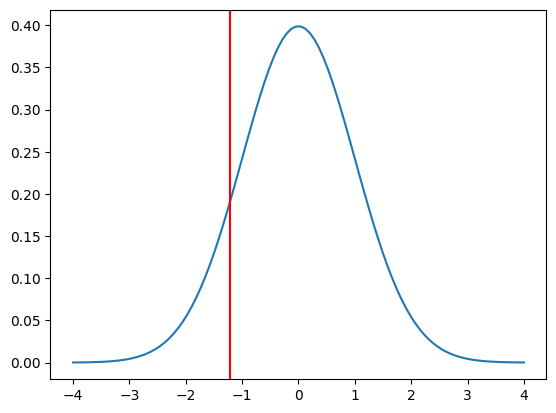

In [8]:
x=np.linspace(-4,4,100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=z,c='r')
plt.show()

In [9]:
round(stats.norm.cdf(3.17,loc=5,scale=1.5), 4)

0.1112

11.12% proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

In [10]:
Z=((3.6-5)/1.5)
Z

-0.9333333333333332

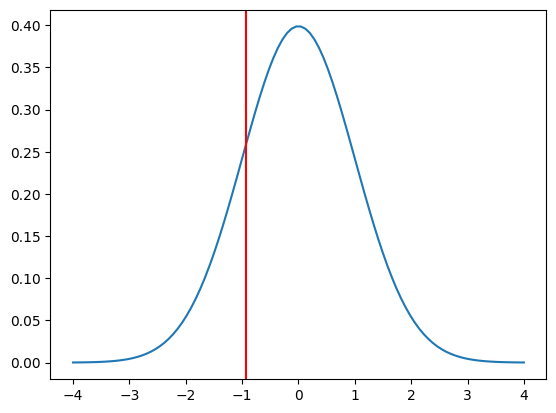

In [11]:
x=np.linspace(-4,4,100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=Z,c='r')
plt.show()

In [12]:
round(1-stats.norm.cdf(3.6,loc=5,scale=1.5),4)

0.8247

82.45% of the gunny bags have a breaking strength at least 3.6 kg per sq cm

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [13]:
z1=((5-5)/1.5)
z1

0.0

In [14]:
z2=((5.5-5)/1.5)
z2

0.3333333333333333

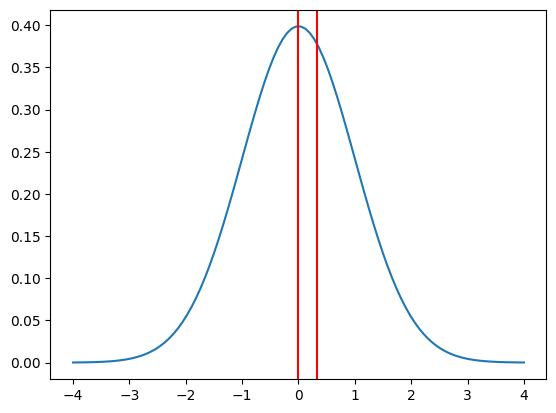

In [15]:
x=np.linspace(-4,4,100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=z1,c='r')
plt.axvline(x=z2,c='r')
plt.show()

In [16]:
round(stats.norm.cdf(5.5,loc=5,scale=1.5)-stats.norm.cdf(5,5,1.5),4)

0.1306

13.06% of gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [17]:
Z1=((3-5)/1.5)
Z1

-1.3333333333333333

In [18]:
Z2=((7.5-5)/1.5)
Z2

1.6666666666666667

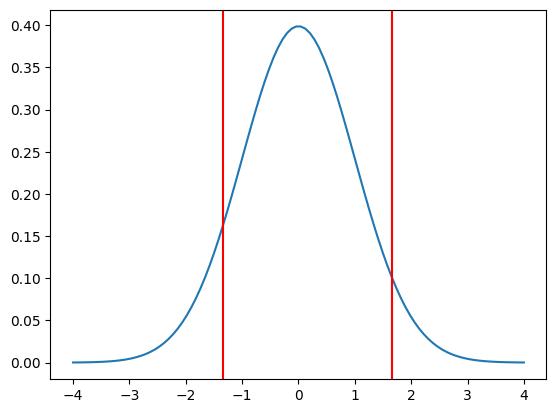

In [19]:
x=np.linspace(-4,4,100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=Z1,c='r')
plt.axvline(x=Z2,c='r')
plt.show()

In [20]:
round(stats.norm.cdf(7.5,5,1.5)-stats.norm.cdf(3,5,1.5),2)

0.86

In [21]:
1-0.86

0.14

14% of proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.

**Problem 3**


Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?


3.2 Is the mean hardness of the polished and unpolished stones the same?

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
df = pd.read_csv('/content/drive/MyDrive/project/Inferential Statistics - Graded Project/Zingaro_Company.csv')

In [24]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


"- State the null and alternate hypotheses - Conduct the hypothesis test and compute the p-value - Write down conclusions from the test results Note: Consider the level of significance as 5%."

1.

𝐻0 : 𝜇 => 150

𝐻𝐴 : 𝜇 < 150

 2. Decide the significance level Here we select 𝛼 = 0.05.


In [26]:
print("The sample size for this problem is",len(df),'.')

The sample size for this problem is 75 .


3: Identify the test statistic: Although the sample size is greater than 30, we do not know the population standard deviation, therefore we use the t-distribution and the t-statistic (t-stat) test statistic.





4.  Calculate the p-value and test statistic using scipy.stats.ttest_1samp, which computes the t-test for the mean of a single sample based on sample observations and the expected value under the null hypothesis. This function provides both the t-statistic and the two-tailed p-value. For our specific case, we require the one-tailed p-value.

In [27]:
t_statistic, p_value = ttest_1samp(df, 150)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [-4.1646296  -1.22891066] p value: [8.34257399e-05 2.22998968e-01] 


In [28]:
8.34257399e-05/2

4.171286995e-05

So here for unpolished stones t statistic=-4.1 and p value for unploished stones is 4.171286995e-05

We reject the null hypothesis since the p-value is less than the level of significance (0.05). Therefore, the statistical decision is to reject the null hypothesis at the 5% level of significance. This suggests sufficient evidence for Zingaro Stone Printing Company to conclude that unpolished stones are not suitable for printing, indicating they have a Brinell hardness index of less than 150.

 3.2 Is the mean hardness of the polished and unpolished stones the same?

In [29]:
df['Treated and Polished'].mean()

147.78811718133335

In [30]:
df['Unpolished '].mean()

134.11052653373332

Mean for Unpolished is 134.11 and for Treated and Polished is 147.79. Therefore, the mean is not same

**Problem 4**


Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

4.1 How does the hardness of implants vary depending on dentists?

4.2 How does the hardness of implants vary depending on methods?

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

4.4 How does the hardness of implants vary depending on dentists and methods together?

In [31]:
df = pd.read_excel('/content/drive/MyDrive/project/Inferential Statistics - Graded Project/Dental+Hardness+data.xlsx')

In [32]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [33]:
df.shape

(90, 5)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [35]:
df.describe(include='all')

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [36]:
df.Dentist.value_counts()


Dentist
1    18
2    18
3    18
4    18
5    18
Name: count, dtype: int64

In [37]:
df.Method.value_counts()

Method
1    30
2    30
3    30
Name: count, dtype: int64

In [38]:
df.Alloy.value_counts()

Alloy
1    45
2    45
Name: count, dtype: int64

In [39]:
df.Temp.value_counts()

Temp
1500    30
1600    30
1700    30
Name: count, dtype: int64

Checking assumptions for the given data set-

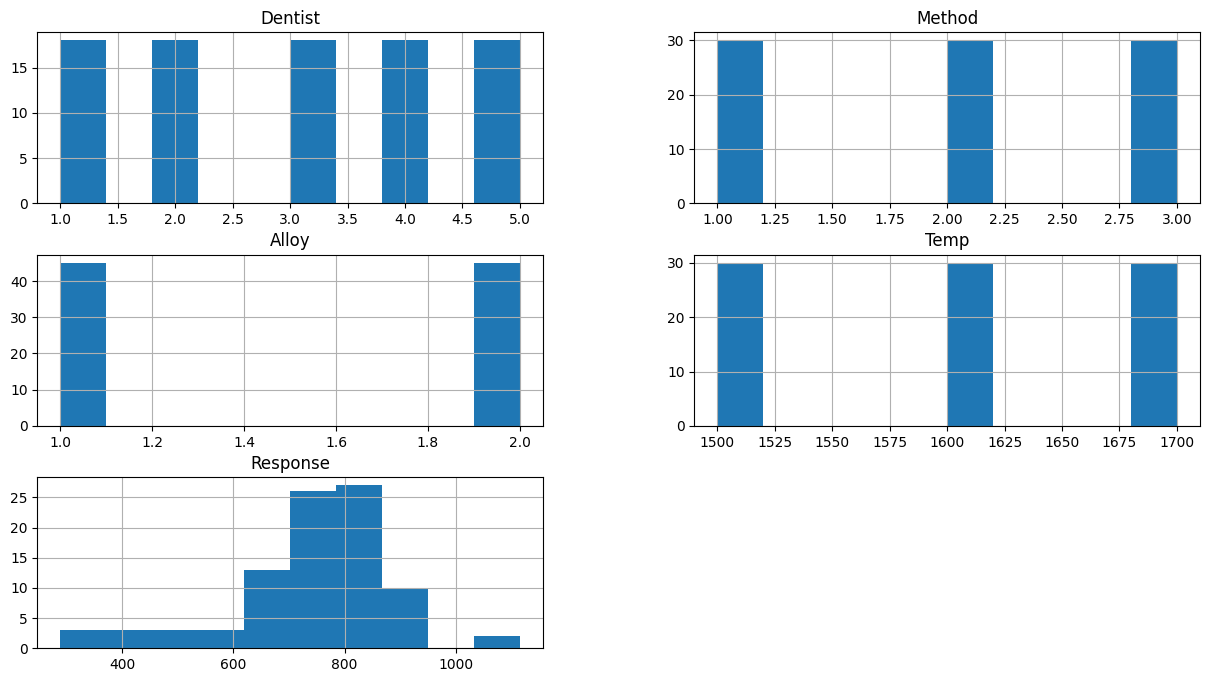

In [40]:
#Checking normality of distribution.
df.hist(figsize=(15,8))
plt.show()

checking outliers

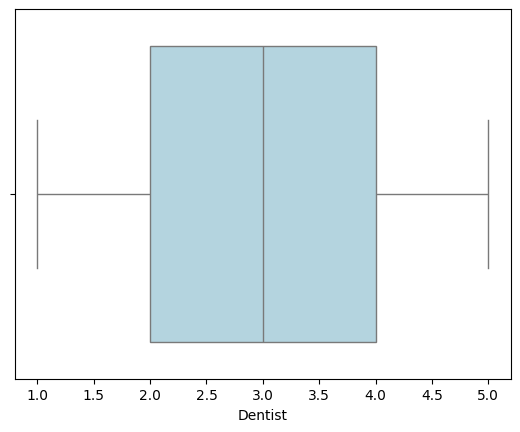

In [41]:
sns.boxplot(x= df['Dentist'], color='lightblue')
plt.show()

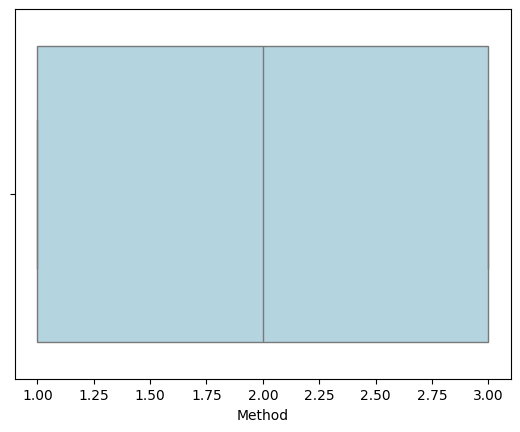

In [42]:
sns.boxplot(x= df['Method'], color='lightblue')
plt.show()

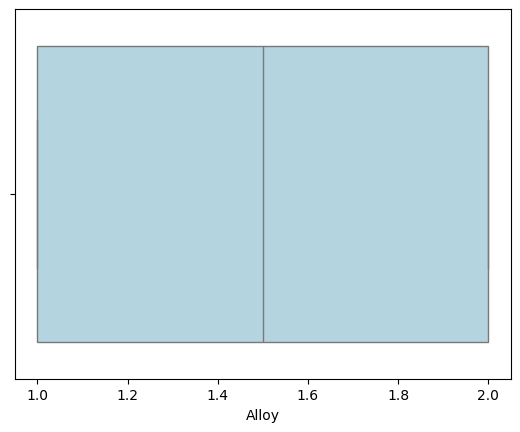

In [43]:
sns.boxplot(x= df['Alloy'], color='lightblue')
plt.show()

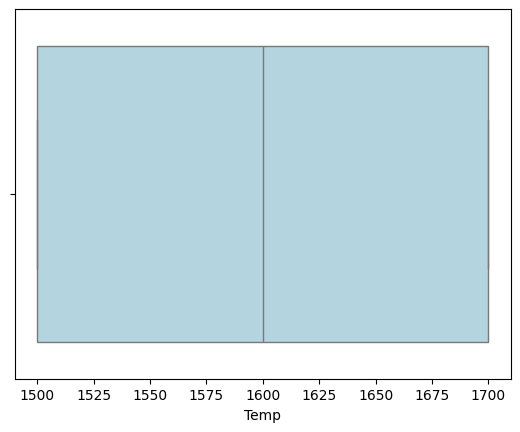

In [44]:
sns.boxplot(x= df['Temp'], color='lightblue')
plt.show()

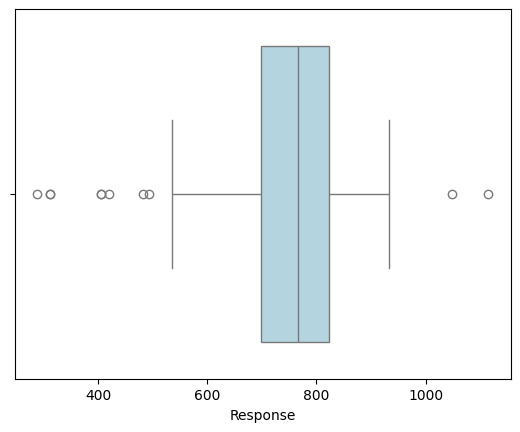

In [45]:
sns.boxplot(x=df['Response'], color='lightblue')
plt.show()

In [46]:
#removing outliers.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
lrincome,urincome=remove_outlier(df['Response'])
df['Response']=np.where(df['Response']>urincome,urincome,df['Response'])
df['Response']=np.where(df['Response']<lrincome,lrincome,df['Response'])

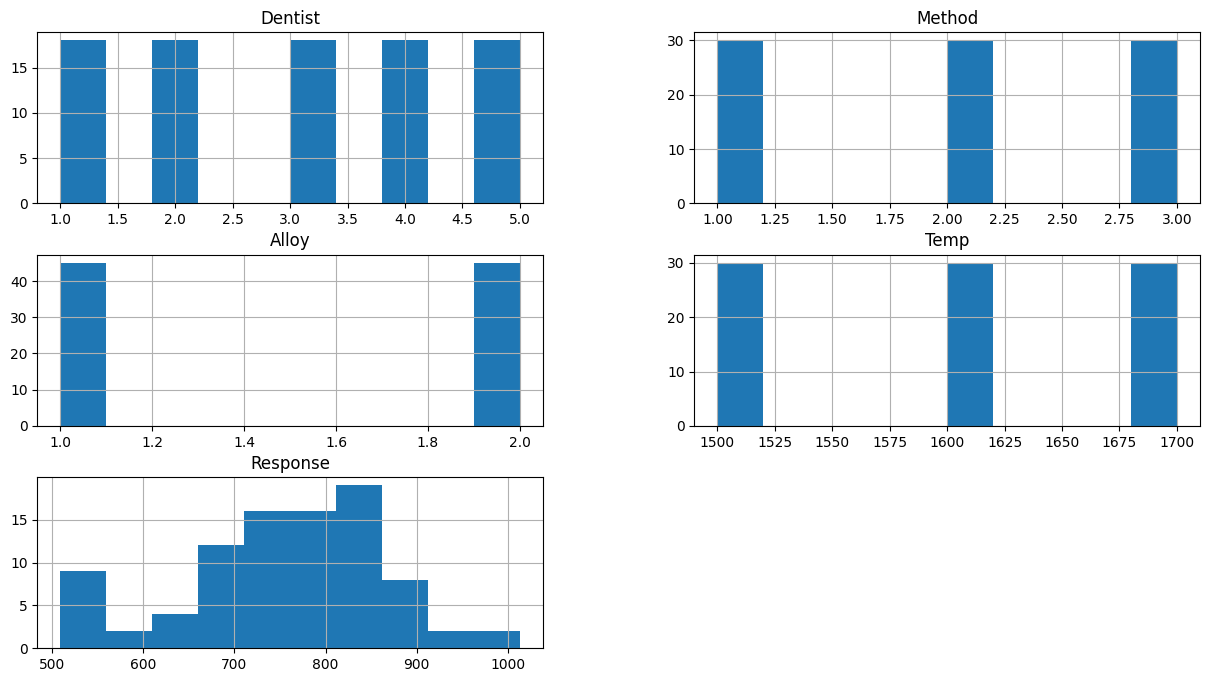

In [48]:
df.hist(figsize=(15,8))
plt.show()


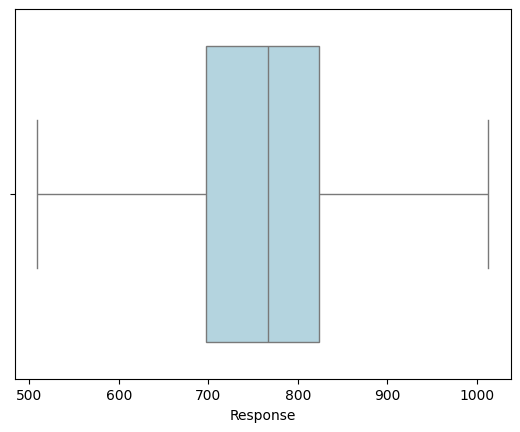

In [49]:
#outliers removed
sns.boxplot(x= df['Response'], color='lightblue')
plt.show()

In [50]:
#changing numerical variables to categorical variables
df['Dentist']= pd.Categorical(df['Dentist'])
df['Method']= pd.Categorical(df['Method'])
df['Alloy']= pd.Categorical(df['Alloy'])
df['Temp']=pd.Categorical(df['Temp'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     float64 
dtypes: category(4), float64(1)
memory usage: 1.8 KB


In [52]:
Dentist_1 = df[df['Dentist']==1]['Response']
Dentist_2 = df[df['Dentist']==2]['Response']
Dentist_3 = df[df['Dentist']==3]['Response']
Dentist_4 = df[df['Dentist']==4]['Response']
Dentist_5 = df[df['Dentist']==5]['Response']

Method_1 = df[df['Method']==1]['Response']
Method_2 = df[df['Method']==2]['Response']
Method_3 = df[df['Method']==3]['Response']

Alloy_1 = df[df['Alloy']==1]['Response']
Alloy_2 = df[df['Alloy']==2]['Response']
Alloy_3 = df[df['Alloy']==3]['Response']

Temp_1 = df[df['Temp']==1500]['Response']
Temp_2 = df[df['Temp']==1600]['Response']
Temp_3 = df[df['Temp']==1700]['Response']

In [53]:
#checking value counts of each group
print(len(Dentist_1))
print(len(Dentist_2))
print(len(Dentist_3))
print(len(Dentist_4))
print(len(Dentist_5))

18
18
18
18
18


In [54]:
print(len(Method_1))
print(len(Method_2))
print(len(Method_3))

30
30
30


In [55]:
print(len(Alloy_1))
print(len(Alloy_2))


45
45


In [56]:
print(len(Temp_1))
print(len(Temp_2))
print(len(Temp_3))

30
30
30


In [57]:
from scipy import stats
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05
print(stats.shapiro([Dentist_1]))
print(stats.shapiro([Dentist_2]))
print(stats.shapiro([Dentist_3]))

print('\n')
print(stats.shapiro([Method_1]))
print(stats.shapiro([Method_2]))
print(stats.shapiro([Method_3]))

print('\n')
print(stats.shapiro([Alloy_1]))
print(stats.shapiro([Alloy_2]))

print('\n')
print(stats.shapiro([Temp_1]))
print(stats.shapiro([Temp_2]))
print(stats.shapiro([Temp_3]))

ShapiroResult(statistic=0.9512532949447632, pvalue=0.4450162947177887)
ShapiroResult(statistic=0.9665580987930298, pvalue=0.7310513854026794)
ShapiroResult(statistic=0.9573881030082703, pvalue=0.5520960092544556)


ShapiroResult(statistic=0.9796934127807617, pvalue=0.8173429369926453)
ShapiroResult(statistic=0.9809848666191101, pvalue=0.8510975241661072)
ShapiroResult(statistic=0.8871710896492004, pvalue=0.0041368273086845875)


ShapiroResult(statistic=0.8991958498954773, pvalue=0.0008944685687310994)
ShapiroResult(statistic=0.9278666377067566, pvalue=0.00789062399417162)


ShapiroResult(statistic=0.9331822395324707, pvalue=0.0596865713596344)
ShapiroResult(statistic=0.9791679382324219, pvalue=0.8030202984809875)
ShapiroResult(statistic=0.9185510277748108, pvalue=0.024601193144917488)


In [58]:
print(stats.anderson(Dentist_1,dist='norm'))
print(stats.anderson(Dentist_2,dist='norm'))
print(stats.anderson(Dentist_3,dist='norm'))

print(stats.anderson(Method_1,dist='norm'))
print(stats.anderson(Method_2,dist='norm'))

print(stats.anderson(Temp_2,dist='norm'))

AndersonResult(statistic=0.4799398656918825, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=777.3888888888889, scale=115.36190567533873)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=0.18489207423293408, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=786.6666666666666, scale=77.43156371159974)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=0.31139490001785575, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=748.6111111111111, scale=69.72562942485933)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResul

In [59]:
print(stats.levene(Dentist_1,Dentist_2,Dentist_3))
print(stats.levene(Method_1,Method_2,Method_3))
print(stats.levene(Alloy_1,Alloy_2))
print(stats.levene(Temp_1,Temp_2,Temp_3))

LeveneResult(statistic=1.3736027902703822, pvalue=0.26240029040554935)
LeveneResult(statistic=3.5342167607107005, pvalue=0.03344085077476839)
LeveneResult(statistic=2.02655886945465, pvalue=0.15810620474519305)
LeveneResult(statistic=0.11898237456285736, pvalue=0.887967666035956)


**The Hypothesis for the One Way ANOVA are:**


H0: The mean response is the same for all three dentists. Ha: For at least one pair the mean response will be different. H0:The mean response is same for both the alloys. Ha:The mean response is different for both the alloys.

In [60]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,7.884522e+04,19711.305556,1.496761,0.210408
Residual,85.0,1.119391e+06,13169.309150,NaN,NaN


Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we the ( ).

Thus dentist does not derive the response. They are from same population.

<ipython-input-61-b46a97990828>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', data=df, ci=None)


<Axes: xlabel='Dentist', ylabel='Response'>

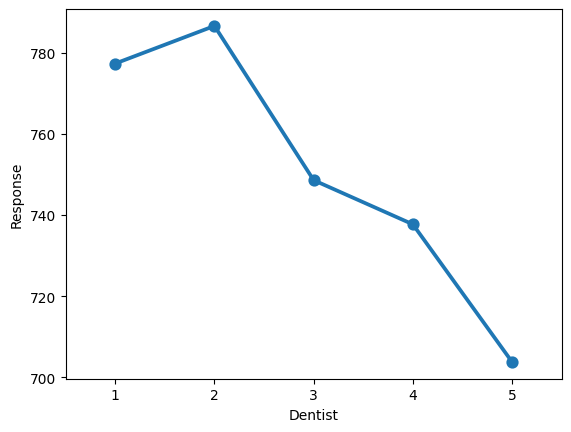

In [61]:
sns.pointplot(x='Dentist', y='Response', data=df, ci=None)

In [62]:
formula = 'Response ~ C(Method) + C(Alloy) + C(Method):C(Alloy)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Method),2.0,381888.600000,190944.300000,23.924098,5.978800e-09
C(Alloy),1.0,99533.877778,99533.877778,12.470957,6.740362e-04
C(Method):C(Alloy),2.0,46388.688889,23194.344444,2.906103,6.020670e-02
Residual,84.0,670425.333333,7981.253968,NaN,NaN


<ipython-input-63-c70969722444>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Method', y='Response', data=df, hue='Alloy', ci=None)


<Axes: xlabel='Method', ylabel='Response'>

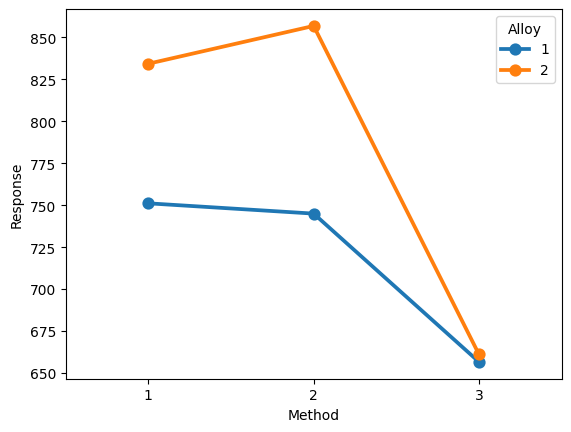

In [63]:
sns.pointplot(x='Method', y='Response', data=df, hue='Alloy', ci=None)

<ipython-input-64-45c2b61f524f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Alloy', y='Response', data=df, hue='Method', ci=None)


<Axes: xlabel='Alloy', ylabel='Response'>

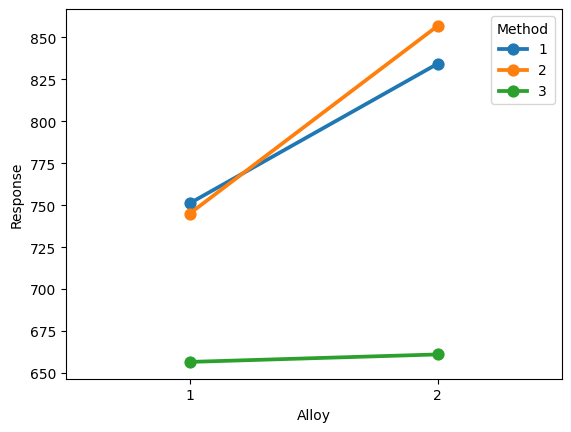

In [64]:
sns.pointplot(x='Alloy', y='Response', data=df, hue='Method', ci=None)

In [65]:
formula = 'Response ~ C(Temp) + C(Alloy)+C(Temp):C(Alloy)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Temp),2.0,3.546060e+04,17730.300000,1.421276,0.247151
C(Alloy),1.0,9.953388e+04,99533.877778,7.978719,0.005911
C(Temp):C(Alloy),2.0,1.534882e+04,7674.411111,0.615187,0.542957
Residual,84.0,1.047893e+06,12474.919048,NaN,NaN


In [66]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,78845.222222,19711.305556,2.548191,4.613193e-02
C(Method),2.0,381888.600000,190944.300000,24.684441,5.795721e-09
C(Dentist):C(Method),8.0,157346.844444,19668.355556,2.542639,1.657388e-02
Residual,75.0,580155.833333,7735.411111,NaN,NaN


Since the p value for interaction effect is way less than alpha, we can conclude that there is no effect of interaction effect on our response variable.

<ipython-input-67-9359df9aecac>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', data=df, hue='Method', ci=None)


<Axes: xlabel='Dentist', ylabel='Response'>

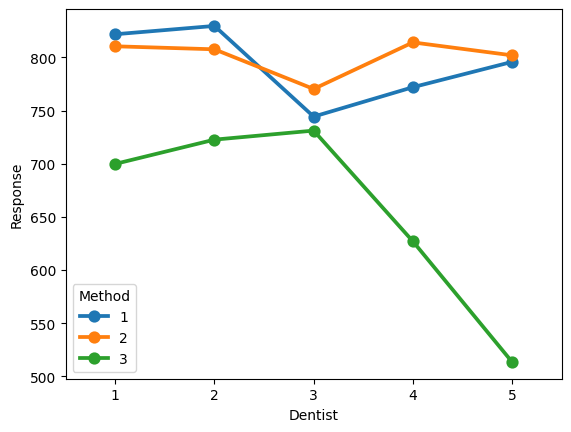

In [67]:
sns.pointplot(x='Dentist', y='Response', data=df, hue='Method', ci=None)

In [78]:
df = pd.read_excel('/content/drive/MyDrive/project/Inferential Statistics - Graded Project/Dental+Hardness+data.xlsx')
print(df.head())

   Dentist  Method  Alloy  Temp  Response
0        1       1      1  1500       813
1        1       1      1  1600       792
2        1       1      1  1700       792
3        1       1      2  1500       907
4        1       1      2  1600       792


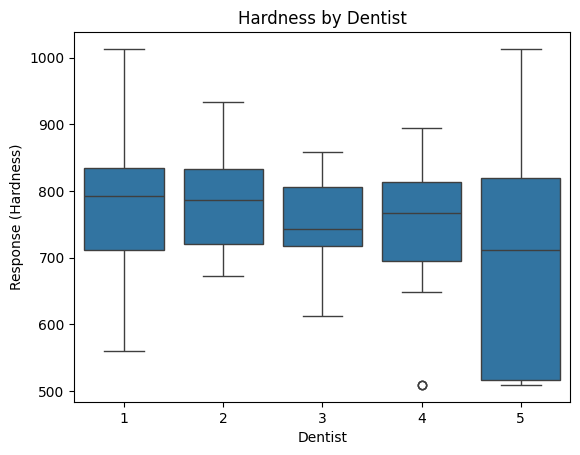

In [75]:
###How does the hardness of implants vary depending on dentists?
sns.boxplot(x='Dentist', y='Response', data=df)
plt.xlabel('Dentist')
plt.ylabel('Response (Hardness)')
plt.title('Hardness by Dentist')
plt.show()

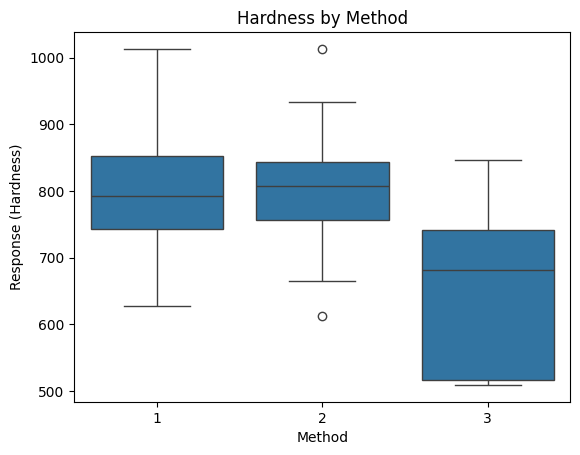

In [74]:
## How does the hardness of implants vary depending on methods?
sns.boxplot(x='Method', y='Response', data=df)
plt.xlabel('Method')
plt.ylabel('Response (Hardness)')
plt.title('Hardness by Method')
plt.show()

In [73]:
### What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Perform a two-way ANOVA
formula = 'Response ~ Dentist * Method * Alloy'
model = ols(formula, df).fit()
anova_results = anova_lm(model)

print(anova_results)

                        df         sum_sq        mean_sq          F  \
Dentist                4.0   78845.222222   19711.305556   3.201522   
Method                 2.0  381888.600000  190944.300000  31.013282   
Alloy                  1.0   99533.877778   99533.877778  16.166349   
Dentist:Method         8.0  157346.844444   19668.355556   3.194546   
Dentist:Alloy          4.0    8179.177778    2044.794444   0.332117   
Method:Alloy           2.0   46388.688889   23194.344444   3.767239   
Dentist:Method:Alloy   8.0   56642.755556    7080.344444   1.149994   
Residual              60.0  369411.333333    6156.855556        NaN   

                            PR(>F)  
Dentist               1.893410e-02  
Method                5.635156e-10  
Alloy                 1.645370e-04  
Dentist:Method        4.374773e-03  
Dentist:Alloy         8.552980e-01  
Method:Alloy          2.875883e-02  
Dentist:Method:Alloy  3.442781e-01  
Residual                       NaN  


In [72]:
### How does the hardness of implants vary depending on dentists and methods together?
formula = 'Response ~ Dentist * Method'
model = ols(formula, df).fit()
anova_results = anova_lm(model)

print(anova_results)


                  df         sum_sq        mean_sq          F        PR(>F)
Dentist          4.0   78845.222222   19711.305556   2.548191  4.613193e-02
Method           2.0  381888.600000  190944.300000  24.684441  5.795721e-09
Dentist:Method   8.0  157346.844444   19668.355556   2.542639  1.657388e-02
Residual        75.0  580155.833333    7735.411111        NaN           NaN
